# Simple Linear Regression

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [11]:
dataset = pd.read_csv('data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

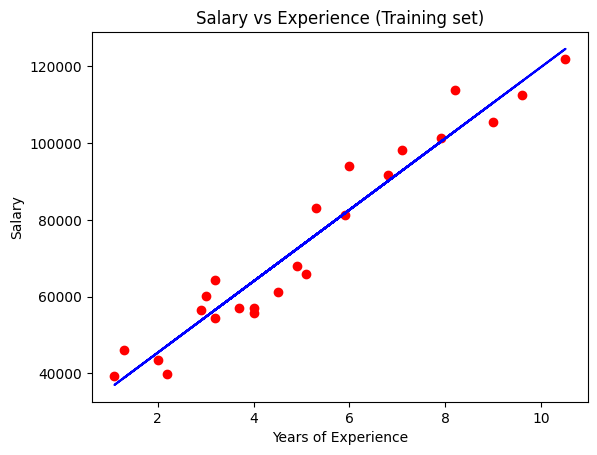

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

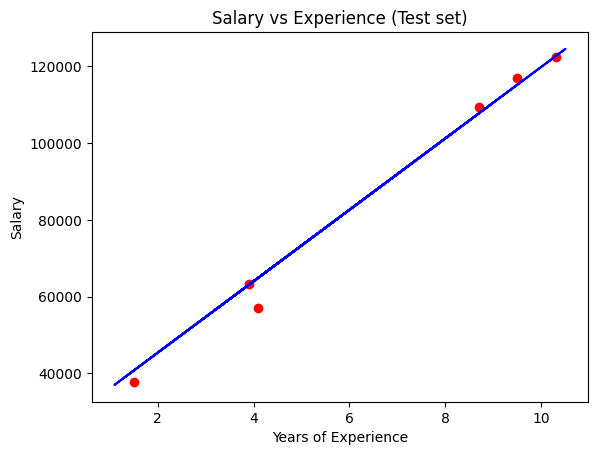

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Making a single prediction (for example the salary of an employee with 12 years of experience)

In [17]:
print(regressor.predict([[12]]))

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## Getting the final linear regression equation with the values of the coefficients

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.099150628157


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

-----

# Multiple Linear Regression

## Importing the libraries and the dataset

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [77]:
print(X)

[[165349.2 136897.8 471784.1 'New York   ']
 [162597.7 151377.59 443898.53 'California ']
 [153441.51 101145.55 407934.54 'Florida    ']
 [144372.41 118671.85 383199.62 'New York   ']
 [142107.34 91391.77 366168.42 'Florida    ']
 [131876.9 99814.71 362861.36 'New York   ']
 [134615.46 147198.87 127716.82 'California ']
 [130298.13 145530.06 323876.68 'Florida    ']
 [120542.52 148718.95 311613.29 'New York   ']
 [123334.88 108679.17 304981.62 'California ']
 [101913.08 110594.11 229160.95 'Florida    ']
 [100671.96 91790.61 249744.55 'California ']
 [93863.75 127320.38 249839.44 'Florida    ']
 [91992.39 135495.07 252664.93 'California ']
 [119943.24 156547.42 256512.92 'Florida    ']
 [114523.61 122616.84 261776.23 'New York   ']
 [78013.11 121597.55 264346.06 'California ']
 [94657.16 145077.58 282574.31 'New York   ']
 [91749.16 114175.79 294919.57 'Florida    ']
 [86419.7 153514.11 0.0 'New York   ']
 [76253.86 113867.3 298664.47 'California ']
 [78389.47 153773.43 299737.29 'New 

In [78]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [80]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [83]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2016 103282.38  ]
 [132582.2776 144259.4   ]
 [132447.7385 146121.95  ]
 [ 71976.0985  77798.83  ]
 [178537.4822 191050.39  ]
 [116161.2423 105008.31  ]
 [ 67851.6921  81229.06  ]
 [ 98791.7337  97483.56  ]
 [113969.4353 110352.25  ]
 [167921.0657 166187.94  ]]


## Evaluating the Model Performance

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282487

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [73]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.9239]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [74]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.6638e+01 -8.7265e+02  7.8601e+02  7.7347e-01  3.2885e-02  3.6610e-02]
42467.529248548686


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

----

# Polynomial Regression

## Importing the libraries and the dataset

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [86]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Training the Linear Regression model on the whole dataset

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

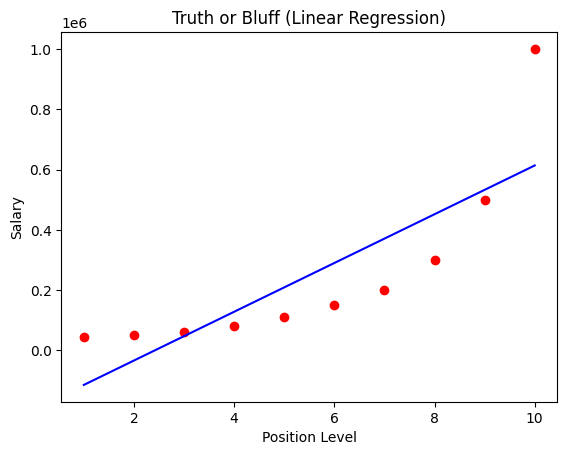

In [89]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

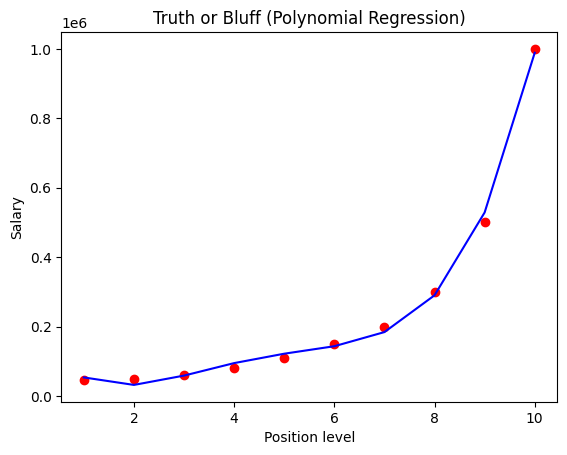

In [90]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/var/folders/d7/69b_q14n7f91jv0xw10s2_c00000gn/T/ipykernel_77297/3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


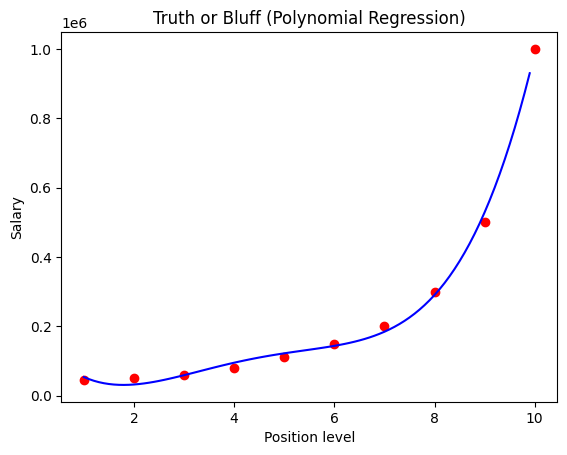

In [91]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [92]:
lin_reg.predict([[6.5]])

array([330378.7879])

## Predicting a new result with Polynomial Regression

In [93]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4527])

## Splitting the dataset into the Training set and Test set

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [96]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 62618.49  60000.  ]
 [554488.62 500000.  ]]


## Evaluating the Model Performance

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9692575841570102

---

# Support Vector Regression (SVR)

## Importing the libraries and the dataset

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [104]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [105]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [106]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [108]:
print(X)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [109]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


## Training the SVR model on the whole dataset

In [110]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [111]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.02]])

## Visualising the SVR results

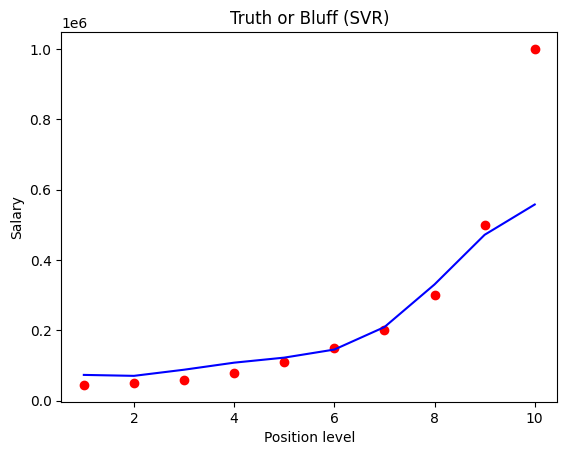

In [112]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

/var/folders/d7/69b_q14n7f91jv0xw10s2_c00000gn/T/ipykernel_77297/1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


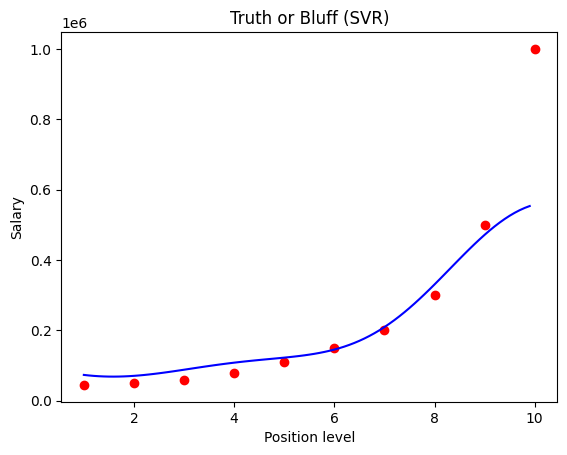

In [113]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Splitting the dataset into the Training set and Test set

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [116]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [117]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.57 -0.67]
 [ 0.66  0.88]]


## Evaluating the Model Performance

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9513839452187653

---

# Decision Tree Regression

## Importing the libraries and the dataset

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

In [120]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [121]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

/var/folders/d7/69b_q14n7f91jv0xw10s2_c00000gn/T/ipykernel_77297/1634290011.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


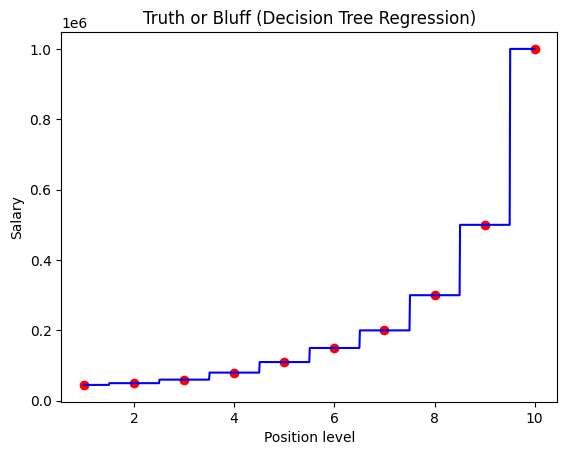

In [122]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Splitting the dataset into the Training set and Test set

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [131]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 50000.  60000.]
 [300000. 500000.]
 [ 80000. 110000.]]


## Evaluating the Model Performance

In [132]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6467547386559449

---

# Random Forest Regression

## Importing the libraries and the dataset

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [138]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [139]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

/var/folders/d7/69b_q14n7f91jv0xw10s2_c00000gn/T/ipykernel_77297/230117209.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


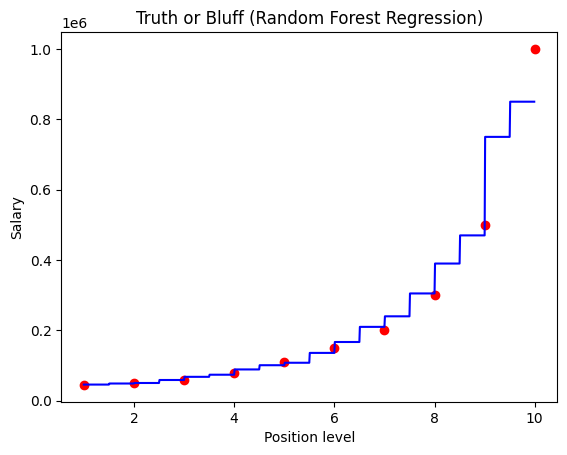

In [140]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Splitting the dataset into the Training set and Test set

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [150]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [151]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 59000.  60000.]
 [440000. 500000.]]


## Evaluating the Model Performance

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9627995867768595

---

# THE END

---